### Part 1: Clustering

Perform clustering on FIFA 18 player performance data (PlayerAttributeData.csv)

Use both visuals and statistical methods (elbow) to identify a cluster multiplicity

Use the PlayerPersonalData.csv data to assign a label to each cluster (e.g. cluster x - average age is young, nationality is Spanish, and wages are high)

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

### Reading the data

In [250]:
data = pd.read_csv('PlayerAttributeData.csv', dtype=str)



In [251]:
data = data.drop(['Unnamed: 0'],1)

In [252]:
data.columns

Index(['Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control',
       'Composure', 'Crossing', 'Curve', 'Dribbling', 'Finishing',
       'Free kick accuracy', 'GK diving', 'GK handling', 'GK kicking',
       'GK positioning', 'GK reflexes', 'Heading accuracy', 'ID',
       'Interceptions', 'Jumping', 'Long passing', 'Long shots', 'Marking',
       'Penalties', 'Positioning', 'Reactions', 'Short passing', 'Shot power',
       'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle',
       'Strength', 'Vision', 'Volleys'],
      dtype='object')

In [253]:
data.shape

(17981, 35)

In [254]:
data[data.ID=='206198']

,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,...,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys
750,55,70,53,49,59,69,51,48,46,23,...,77,75,49,77,68,69,83,84,65,26
804,55,70,53,49,59,69,51,48,46,23,...,77,75,49,77,68,69,83,84,65,26


In [255]:
data[data['ID'].duplicated()==True].count()

Acceleration          52
Aggression            52
Agility               52
Balance               52
Ball control          52
Composure             52
Crossing              52
Curve                 52
Dribbling             52
Finishing             52
Free kick accuracy    52
GK diving             52
GK handling           52
GK kicking            52
GK positioning        52
GK reflexes           52
Heading accuracy      52
ID                    52
Interceptions         52
Jumping               52
Long passing          52
Long shots            52
Marking               52
Penalties             52
Positioning           52
Reactions             52
Short passing         52
Shot power            52
Sliding tackle        52
Sprint speed          52
Stamina               52
Standing tackle       52
Strength              52
Vision                52
Volleys               52
dtype: int64

In [271]:
data = data.drop_duplicates().reset_index(drop=True)

In [272]:
data.head()

,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,...,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys
0,89,63,89,63,93,95,85,81,91,94,...,96,83,94,23,91,92,31,80,85,88
1,92,48,90,95,95,96,77,89,97,95,...,95,88,85,26,87,73,28,59,90,85
2,94,56,96,82,95,92,75,81,96,89,...,88,81,80,33,90,78,24,53,80,83
3,88,78,86,60,91,83,77,86,86,94,...,93,83,87,38,77,89,45,80,84,88
4,58,29,52,35,48,70,15,14,30,13,...,85,55,25,11,61,44,10,83,70,11


In [273]:
data.tail()

,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,...,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys
17924,24,16,38,26,12,23,14,13,12,5,...,40,19,19,10,32,28,11,50,26,6
17925,25,44,35,44,22,44,11,12,11,11,...,51,12,13,13,25,32,12,47,17,12
17926,66,26,60,77,41,50,28,32,37,47,...,54,42,42,14,51,33,17,32,37,33
17927,57,46,58,74,43,45,34,30,41,32,...,49,49,43,47,58,49,48,46,51,25
17928,48,52,49,47,32,33,19,17,23,20,...,40,31,21,43,49,55,44,67,22,19


In [258]:
data.shape

(17929, 35)

In [259]:
data2=data

In [260]:
data.isnull().sum()

Acceleration          0
Aggression            0
Agility               0
Balance               0
Ball control          0
Composure             0
Crossing              0
Curve                 0
Dribbling             0
Finishing             0
Free kick accuracy    0
GK diving             0
GK handling           0
GK kicking            0
GK positioning        0
GK reflexes           0
Heading accuracy      0
ID                    0
Interceptions         0
Jumping               0
Long passing          0
Long shots            0
Marking               0
Penalties             0
Positioning           0
Reactions             0
Short passing         0
Shot power            0
Sliding tackle        0
Sprint speed          0
Stamina               0
Standing tackle       0
Strength              0
Vision                0
Volleys               0
dtype: int64

In [214]:
ids=data['ID']

In [215]:
ids

0         20801
1        158023
2        190871
3        176580
4        167495
          ...  
17976    237463
17977     11728
17978    231381
17979    238813
17980    238308
Name: ID, Length: 17929, dtype: object

In [216]:
data.head()

,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,...,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys
0,89,63,89,63,93,95,85,81,91,94,...,96,83,94,23,91,92,31,80,85,88
1,92,48,90,95,95,96,77,89,97,95,...,95,88,85,26,87,73,28,59,90,85
2,94,56,96,82,95,92,75,81,96,89,...,88,81,80,33,90,78,24,53,80,83
3,88,78,86,60,91,83,77,86,86,94,...,93,83,87,38,77,89,45,80,84,88
4,58,29,52,35,48,70,15,14,30,13,...,85,55,25,11,61,44,10,83,70,11


In [261]:
data.columns


Index(['Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control',
       'Composure', 'Crossing', 'Curve', 'Dribbling', 'Finishing',
       'Free kick accuracy', 'GK diving', 'GK handling', 'GK kicking',
       'GK positioning', 'GK reflexes', 'Heading accuracy', 'ID',
       'Interceptions', 'Jumping', 'Long passing', 'Long shots', 'Marking',
       'Penalties', 'Positioning', 'Reactions', 'Short passing', 'Shot power',
       'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle',
       'Strength', 'Vision', 'Volleys'],
      dtype='object')

In [219]:
data.dtypes

Acceleration          object
Aggression            object
Agility               object
Balance               object
Ball control          object
Composure             object
Crossing              object
Curve                 object
Dribbling             object
Finishing             object
Free kick accuracy    object
GK diving             object
GK handling           object
GK kicking            object
GK positioning        object
GK reflexes           object
Heading accuracy      object
ID                    object
Interceptions         object
Jumping               object
Long passing          object
Long shots            object
Marking               object
Penalties             object
Positioning           object
Reactions             object
Short passing         object
Shot power            object
Sliding tackle        object
Sprint speed          object
Stamina               object
Standing tackle       object
Strength              object
Vision                object
Volleys       

In [220]:
data.shape

(17929, 35)

In [221]:
data.Acceleration.unique()

array(['89', '92', '94', '88', '58', '79', '57', '93', '60', '78', '75',
       '76', '46', '90', '68', '49', '43', '87', '77', '95', '62', '72',
       '65', '70', '63', '82', '69', '67', '54', '55', '74', '86', '84',
       '48', '80', '71', '85', '40', '51', '38', '53', '73', '45', '61',
       '64', '44', '42', '81', '91', '59', '52', '66', '39', '34', '50',
       '83', '47', '96', '31', '30', '70+9', '56', '26', '80+1', '35',
       '36', '32', '49-1', '41', '67+2', '37', '28', '33', '20', '79-2',
       '65-2', '29', '91-2', '74-3', '75+1', '41-6', '74+1', '70+3', '17',
       '75+5', '74+2', '71+2', '68+1', '71+4', '89-2', '25', '27', '24',
       '58-10', '78+1', '86+1', '66-1', '22', '66+1', '15', '74+4',
       '71-3', '80+2', '21', '23', '64-2', '18', '57-4', '78+3', '19',
       '73+9', '82-3', '68+3', '68+2', '55-8', '55-1', '43-2', '77+3',
       '82+10', '16', '49-10', '72+1', '61+1', '79+8', '70-2', '13', '14',
       '60-2', '86+7', '81+4', '69+3', '65-10', '64-3', '7

In [284]:
data = data.applymap(eval)# sum up the data invert to int

In [285]:
data.dtypes

Acceleration          int64
Aggression            int64
Agility               int64
Balance               int64
Ball control          int64
Composure             int64
Crossing              int64
Curve                 int64
Dribbling             int64
Finishing             int64
Free kick accuracy    int64
GK diving             int64
GK handling           int64
GK kicking            int64
GK positioning        int64
GK reflexes           int64
Heading accuracy      int64
ID                    int64
Interceptions         int64
Jumping               int64
Long passing          int64
Long shots            int64
Marking               int64
Penalties             int64
Positioning           int64
Reactions             int64
Short passing         int64
Shot power            int64
Sliding tackle        int64
Sprint speed          int64
Stamina               int64
Standing tackle       int64
Strength              int64
Vision                int64
Volleys               int64
dtype: object

In [286]:
data.shape

(17929, 35)

In [224]:
#data_cln = data.applymap(lambda x: re.sub(r'[\+|\-]\d+$','',str(x)))

In [225]:
#sns.pairplot(data,palette='Set1')

### Explore the data

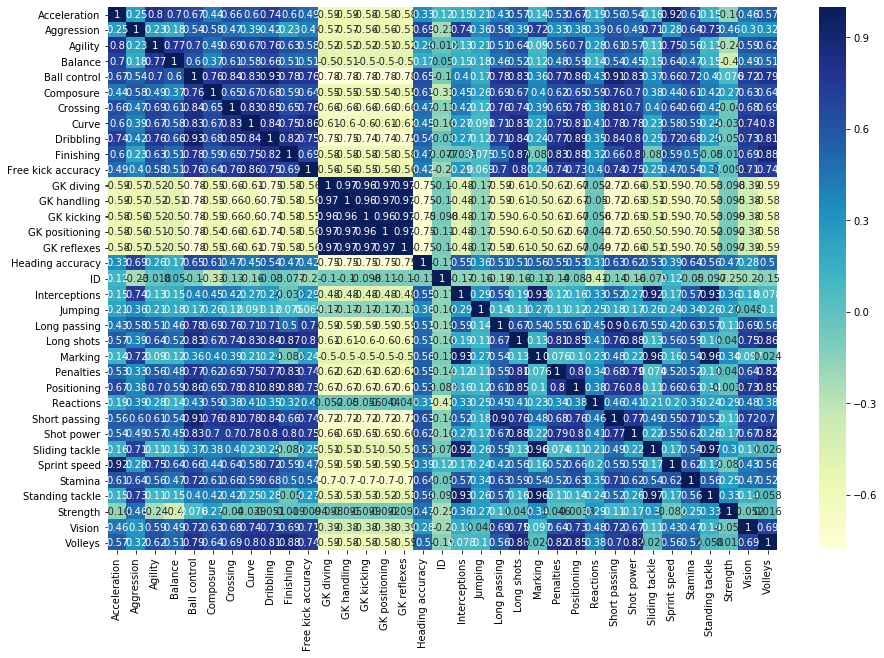

In [225]:
fig, ax = plt.subplots(figsize=(15,10)) #find correlations
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='YlGnBu')
plt.show()

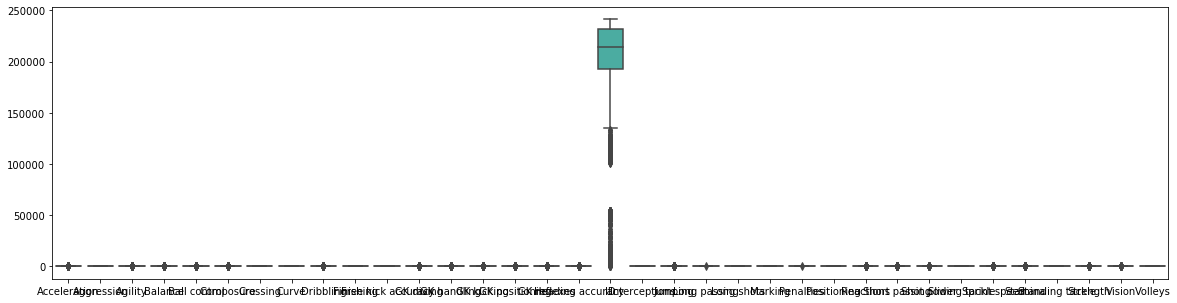

In [388]:
plt.figure(figsize=(20,5))
sns.boxplot(data = data)

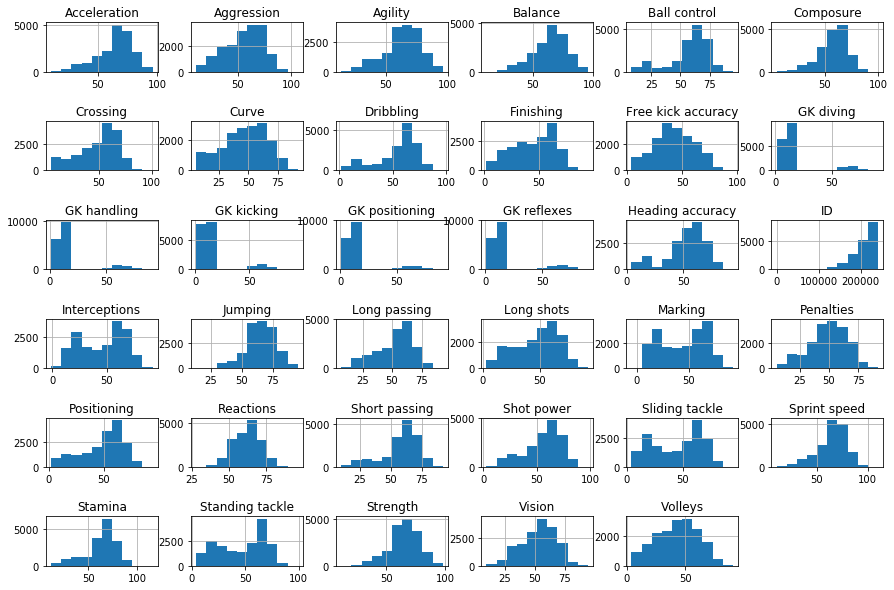

In [384]:

data.hist(figsize = (15,10))
plt.subplots_adjust(hspace=1) 
#plt.axvlines(np.mean(data['Acceleration']), label='Mean - {:.3f}'.format(np.mean(data['Acceleration'])))

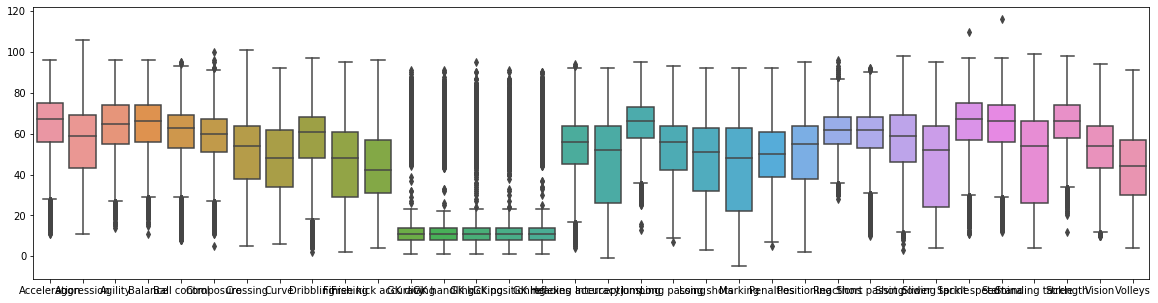

In [387]:
plt.figure(figsize=(20,5))
sns.boxplot(data = data.drop('ID', axis=1))

In [287]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [288]:
#scale the data
sc = StandardScaler()
sc_data = sc.fit_transform(data.drop(['ID'],1))
sc_data = pd.DataFrame(sc_data, columns=data.drop(['ID'],1).columns)

In [274]:
ids=data['ID']
#ids = ids.dropna()
ids

#cluster

0         20801
1        158023
2        190871
3        176580
4        167495
          ...  
17924    237463
17925     11728
17926    231381
17927    238813
17928    238308
Name: ID, Length: 17929, dtype: object

In [406]:
#cluster=cluster.drop(['ID'],1)

In [276]:
cluster

,cluster,id
0,0,20801
1,0,158023
2,0,190871
3,0,176580
4,1,167495
...,...,...
17924,1,237535
17925,1,231651
17926,3,233699
17927,2,225510


In [245]:
ids

0         20801
1        158023
2        190871
3        176580
4        167495
          ...  
17976    237463
17977     11728
17978    231381
17979    238813
17980    238308
Name: ID, Length: 17929, dtype: int64

In [262]:
cluster['id']=data['ID']

In [168]:
ids.isna().sum()
ids=ids.astype(int)

In [170]:
cluster['ID']=ids

In [452]:
#cluster[cluster.id.isna()==True]

In [234]:
cluster=cluster.drop(['ID'],1)

In [167]:
cluster.isna().sum()

cluster    0
dtype: int64

In [268]:
cluster

,cluster,id
0,0,20801
1,0,158023
2,0,190871
3,0,176580
4,1,167495
...,...,...
17924,1,237535
17925,1,231651
17926,3,233699
17927,2,225510


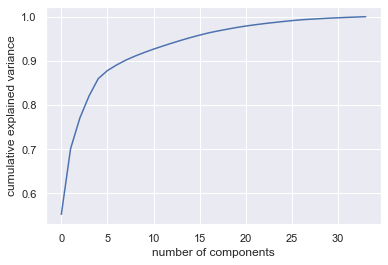

In [289]:
pca = PCA().fit(sc_data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [510]:
from sklearn.decomposition import PCA
pca = PCA(3)


In [511]:
sc_data.columns

Index(['Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control',
       'Composure', 'Crossing', 'Curve', 'Dribbling', 'Finishing',
       'Free kick accuracy', 'GK diving', 'GK handling', 'GK kicking',
       'GK positioning', 'GK reflexes', 'Heading accuracy', 'Interceptions',
       'Jumping', 'Long passing', 'Long shots', 'Marking', 'Penalties',
       'Positioning', 'Reactions', 'Short passing', 'Shot power',
       'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle',
       'Strength', 'Vision', 'Volleys'],
      dtype='object')

In [512]:
pca.fit(sc_data)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [513]:
len(pca.components_)

3

In [514]:
pca.components_

array([[-0.16350837, -0.14520747, -0.16526411, -0.14522196, -0.21993554,
        -0.17944699, -0.20023971, -0.19632007, -0.21288709, -0.17819346,
        -0.18397907,  0.1972867 ,  0.19676046,  0.19614294,  0.19634498,
         0.19708305, -0.16610363, -0.11518009, -0.05647999, -0.18587974,
        -0.19524468, -0.10748188, -0.18185909, -0.20001037, -0.0940456 ,
        -0.21028487, -0.19680712, -0.10879319, -0.16277098, -0.1853266 ,
        -0.11515956, -0.02561202, -0.16208615, -0.18475036],
       [-0.12103542,  0.25369247, -0.15989845, -0.1331777 , -0.04258185,
         0.02793126, -0.03977967, -0.11664007, -0.10944471, -0.22160108,
        -0.09254019, -0.08018477, -0.08063257, -0.0809207 , -0.07921544,
        -0.08062865,  0.16987674,  0.34703908,  0.1168712 ,  0.06641266,
        -0.143218  ,  0.36725618, -0.14430566, -0.15316079,  0.01396055,
         0.02506493, -0.07828423,  0.36158514, -0.10023911,  0.10018778,
         0.35996741,  0.22325669, -0.14722977, -0.17913573],
  

In [295]:
print(pca.explained_variance_)

[18.7925166   5.04707375  2.35195033  1.70584536  1.33713346]


In [515]:
sc_data_pca = pca.transform(sc_data)
print("original shape:   ", sc_data.shape)
print("transformed shape:", sc_data_pca.shape)

original shape:    (17929, 34)
transformed shape: (17929, 3)


In [516]:
pca_data=pd.DataFrame(sc_data_pca)

In [517]:
pca_data

,0,1,2
0,-8.114011,-3.671575,4.329149
1,-7.900760,-5.313969,3.336370
2,-7.103004,-4.742318,2.429208
3,-6.359463,-3.287122,5.459131
4,8.578479,-1.739644,6.874676
...,...,...,...
17924,11.771275,-1.026952,-1.427030
17925,10.580225,-0.345354,-0.782149
17926,3.112532,-2.617942,-2.795928
17927,2.325186,0.351658,-2.615703


###  K-means clustering

In [395]:
#data_k=sc_data.drop(['ID'],1)

In [396]:
#data_k.shape

(17929, 34)

In [299]:
wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10)
    y_means = kmeans.fit(pca_data)
    wcss.append(y_means.inertia_)

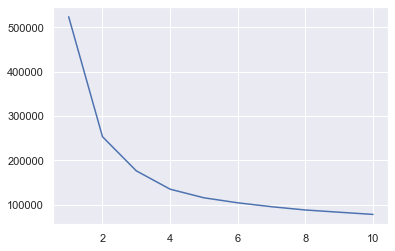

In [300]:
plt.plot(range(1,11), wcss)
plt.show()

In [519]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10)
y_kmeans = kmeans.fit_predict(pca_data)

In [520]:
np.cumsum(pca.explained_variance_ratio_)

array([0.55269025, 0.70112531, 0.77029647])

In [521]:
colmeans=pca_data.mean()

In [522]:
colmeans

0   -5.616197e-16
1    1.054182e-16
2   -2.112080e-16
dtype: float64

In [523]:
y_kmeans_ = y_kmeans
cluster = pd.DataFrame(y_kmeans_,columns=['cluster'])

In [524]:
cluster

,cluster
0,2
1,2
2,2
3,2
4,1
...,...
17924,1
17925,1
17926,0
17927,0


In [525]:
pca_data['cluster'] = cluster

In [526]:
pca_data

,0,1,2,cluster
0,-8.114011,-3.671575,4.329149,2
1,-7.900760,-5.313969,3.336370,2
2,-7.103004,-4.742318,2.429208,2
3,-6.359463,-3.287122,5.459131,2
4,8.578479,-1.739644,6.874676,1
...,...,...,...,...
17924,11.771275,-1.026952,-1.427030,1
17925,10.580225,-0.345354,-0.782149,1
17926,3.112532,-2.617942,-2.795928,0
17927,2.325186,0.351658,-2.615703,0


In [318]:
data.columns

Index(['Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control',
       'Composure', 'Crossing', 'Curve', 'Dribbling', 'Finishing',
       'Free kick accuracy', 'GK diving', 'GK handling', 'GK kicking',
       'GK positioning', 'GK reflexes', 'Heading accuracy', 'ID',
       'Interceptions', 'Jumping', 'Long passing', 'Long shots', 'Marking',
       'Penalties', 'Positioning', 'Reactions', 'Short passing', 'Shot power',
       'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle',
       'Strength', 'Vision', 'Volleys'],
      dtype='object')

In [315]:
ids

0         20801
1        158023
2        190871
3        176580
4        167495
          ...  
17924    237463
17925     11728
17926    231381
17927    238813
17928    238308
Name: ID, Length: 17929, dtype: object

In [527]:
cluster['ID']=ids

In [528]:
cluster

,cluster,ID
0,2,20801
1,2,158023
2,2,190871
3,2,176580
4,1,167495
...,...,...
17924,1,237463
17925,1,11728
17926,0,231381
17927,0,238813


In [407]:
#data_cl=pd.DataFrame(data_k.groupby(['cluster']).mean())

In [552]:
#data_new=pca.inverce_transform(data_pca)

merges.isna().sum()

cluster        0
ID             0
Name           0
Age            0
Nationality    0
Overall        0
Potential      0
Club           0
Value          0
Wage           0
Special        0
dtype: int64

In [555]:
merges.sort_values(by = 'cluster')

,cluster,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special
8964,0,212540,S. Caldwell,26,United States,66,69,New England Revolution,775,3,1705
10598,0,220101,M. Acosta,25,Paraguay,65,67,CD Once Caldas Manizales,550,1,1728
10600,0,159941,C. Lanoas,25,Chile,65,65,CD Palestino,475,1,1652
10605,0,231366,P. Lienhart,20,Austria,65,77,SC Freiburg,850,22,1415
10607,0,206535,P. Digby,22,England,65,72,Mansfield Town,650,5,1718
...,...,...,...,...,...,...,...,...,...,...,...
9813,2,235515,Benito,21,Spain,66,78,UD Las Palmas,1200,5,1552
9814,2,202748,Ko Moo Yeol,26,Korea Republic,66,66,Jeonbuk Hyundai Motors,700,4,1666
9816,2,233980,Jallyson Neto,25,Brazil,66,66,Sport Club do Recife,550,4,1776
3663,2,190614,D. Álvarez,35,Colombia,72,72,La Equidad,1400,2,1715


In [567]:
merges.isna().sum()

cluster        0
ID             0
Name           0
Age            0
Nationality    0
Overall        0
Potential      0
Club           0
Value          0
Wage           0
Special        0
dtype: int64

In [568]:
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(merges.sort_values(by = 'cluster').drop(columns = 'cluster'), cmap='YlGnBu');

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

### Loading the personal data

In [332]:
data2 = pd.read_csv('PlayerPersonalData.csv',dtype=str)
data2.head()

,Unnamed: 0,Unnamed: 0.1,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special
0,0,0,20801,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,€95.5M,€565K,2228
1,1,1,158023,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,€105M,€565K,2154
2,2,2,190871,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,€123M,€280K,2100
3,3,3,176580,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,€97M,€510K,2291
4,4,4,167495,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,€61M,€230K,1493


In [333]:
data2.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'ID', 'Name', 'Age', 'Photo',
       'Nationality', 'Flag', 'Overall', 'Potential', 'Club', 'Club Logo',
       'Value', 'Wage', 'Special'],
      dtype='object')

In [334]:
data2 = data2.drop(['Unnamed: 0','Unnamed: 0.1','Photo'],1)

In [335]:
data2 = data2.drop(['Club Logo'],1)

In [336]:
data2 = data2.drop(['Flag'],1)

In [337]:
data2.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special
0,20801,Cristiano Ronaldo,32,Portugal,94,94,Real Madrid CF,€95.5M,€565K,2228
1,158023,L. Messi,30,Argentina,93,93,FC Barcelona,€105M,€565K,2154
2,190871,Neymar,25,Brazil,92,94,Paris Saint-Germain,€123M,€280K,2100
3,176580,L. Suárez,30,Uruguay,92,92,FC Barcelona,€97M,€510K,2291
4,167495,M. Neuer,31,Germany,92,92,FC Bayern Munich,€61M,€230K,1493


In [338]:
data2.isnull().sum()

ID               0
Name             0
Age              0
Nationality      0
Overall          0
Potential        0
Club           248
Value            0
Wage             0
Special          0
dtype: int64

In [339]:
data2[data2['ID'].duplicated()==True].count()

ID             52
Name           52
Age            52
Nationality    52
Overall        52
Potential      52
Club           52
Value          52
Wage           52
Special        52
dtype: int64

In [340]:
# removing dublicates
data2 = data2.drop_duplicates()

In [341]:
cluster['ID']=ids


In [342]:
cluster['ID'].isna().sum()

0

In [532]:
cluster["ID"]=cluster["ID"].astype(str)
data2["ID"]=data2["ID"].astype(str)
merges = pd.merge(cluster,data2, how = "inner", on="ID")


In [559]:
merges['ID'].astype(int)
merges.head()

,cluster,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special
0,2,20801,Cristiano Ronaldo,32,Portugal,94,94,Real Madrid CF,95500,565,2228
1,2,158023,L. Messi,30,Argentina,93,93,FC Barcelona,105000,565,2154
2,2,190871,Neymar,25,Brazil,92,94,Paris Saint-Germain,123000,280,2100
3,2,176580,L. Suárez,30,Uruguay,92,92,FC Barcelona,97000,510,2291
4,1,167495,M. Neuer,31,Germany,92,92,FC Bayern Munich,61000,230,1493


In [534]:
merges.shape

(17929, 11)

In [535]:
merges.columns

Index(['cluster', 'ID', 'Name', 'Age', 'Nationality', 'Overall', 'Potential',
       'Club', 'Value', 'Wage', 'Special'],
      dtype='object')

In [536]:
merges['Value']=merges['Value'].str.replace('€',"")

In [537]:
merges['Value']=merges['Value'].str.replace('M',"*1000")

In [538]:
merges['Value']=merges['Value'].str.replace('K',"")

In [539]:
merges['Wage']=merges['Wage'].str.replace('K',"")

In [540]:
merges['Wage']=merges['Wage'].str.replace('€',"")

In [541]:
merges['Wage'] = merges['Wage'].apply(eval)

In [542]:
merges['Value'] = merges['Value'].apply(eval)

In [543]:
merges.groupby(['cluster'])['Value'].mean()


cluster
0    1298.796178
1    1554.135375
2    3217.369351
Name: Value, dtype: float64

In [544]:
merges['Value']=merges['Value'].astype(int)

In [560]:
merges.isna().sum()

cluster        0
ID             0
Name           0
Age            0
Nationality    0
Overall        0
Potential      0
Club           0
Value          0
Wage           0
Special        0
dtype: int64

In [561]:
merges.Club = merges.Club.replace(np.nan, 'Unknown')

In [562]:
np.cumsum(pca.explained_variance_ratio_)

array([0.55269025, 0.70112531, 0.77029647])

In [360]:
merges.shape

(17929, 11)

In [383]:
merges.columns

Index(['cluster', 'ID', 'Name', 'Age', 'Nationality', 'Overall', 'Potential',
       'Club', 'Value', 'Wage', 'Special'],
      dtype='object')

In [503]:
group=pd.DataFrame(merges.groupby(['cluster']).mean())

In [506]:
group=group.reset_index()

In [507]:
merges_ = pd.merge(data_cl,group, how = "inner", on="cluster")

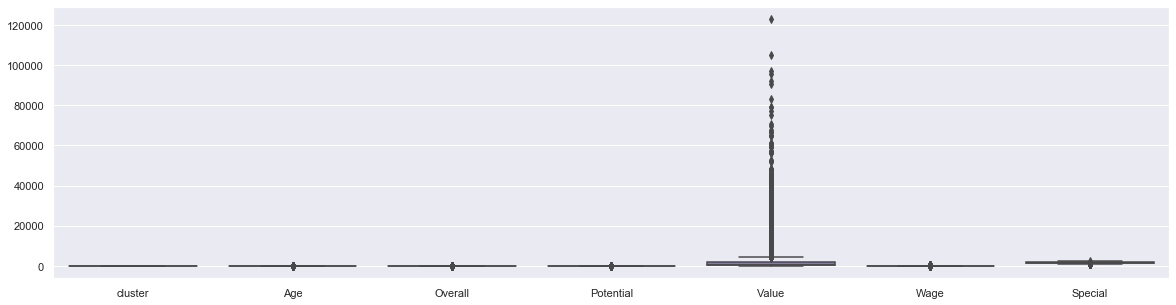

In [407]:
plt.figure(figsize=(20,5))
sns.boxplot(data = merges.drop('ID', axis=1))

In [398]:
for group in range(4):
    df_group=merges.loc[merges['cluster'] == group]
    for column in df_group.columns:
        try:
            print('group %s, column %s, mode %s'%(group,column,stats.mode(df_group[column], axis=None)[0]))
        except:
           print('Error in group %s, column %s'%(group,column))

group 0, column cluster, mode [0]
group 0, column ID, mode ['101769']
group 0, column Name, mode ['A. Traoré']
group 0, column Age, mode ['25']
group 0, column Nationality, mode ['Spain']
group 0, column Overall, mode ['71']
group 0, column Potential, mode ['74']
group 0, column Club, mode ['Unknown']
group 0, column Value, mode [1100]
group 0, column Wage, mode [1]
group 0, column Special, mode ['1782']
group 1, column cluster, mode [1]
group 1, column ID, mode ['102064']
group 1, column Name, mode ['Felipe']
group 1, column Age, mode ['20']
group 1, column Nationality, mode ['England']
group 1, column Overall, mode ['64']
group 1, column Potential, mode ['70']
group 1, column Club, mode ['Unknown']
group 1, column Value, mode [425]
group 1, column Wage, mode [1]
group 1, column Special, mode ['1562']
group 2, column cluster, mode [2]
group 2, column ID, mode ['101317']
group 2, column Name, mode ['A. Smith']
group 2, column Age, mode ['21']
group 2, column Nationality, mode ['England

In [399]:
# Let's see which column is more representative of each group
for group in range(4):
    df_group=merges.loc[merges['cluster'] == group]
    df_group=df_group.drop(labels=['cluster'],axis=1)
    count=0
    for column in df_group.columns:
        try:
            representative_mode=stats.mode(df_group[column], axis=None)
            if representative_mode[1] > count:
                representative=stats.mode(df_group[column], axis=None)[0]
                count = stats.mode(df_group[column], axis=None)[1]
                representative_column=column
        except:
            pass

    print('group %s, column %s, mode %s'%(group,representative_column,representative))

group 0, column Age, mode ['25']
group 1, column Wage, mode [1]
group 2, column Wage, mode [1]
group 3, column Wage, mode [1]


In [402]:
# Let's see which column is more representative of each group
for group in range(4):
    df_group=merges.loc[merges['cluster'] == group]
    df_group=df_group.drop(labels=['cluster'],axis=1)
    count=0
    for column in df_group.columns:
        try:
            representative_mode=stats.mode(df_group[column], axis=None)
            if representative_mode[1] > count:
                representative=stats.mode(df_group[column], axis=None)[0]
                count = stats.mode(df_group[column], axis=None)[1]
                representative_column=column
        except:
            pass

    print('group %s, column %s, mode %s'%(group,representative_column,representative))

group 0, column Age, mode ['25']
group 1, column Wage, mode [1]
group 2, column Wage, mode [1]
group 3, column Wage, mode [1]


In [428]:
merges[merges['cluster'] == 0].Age.astype('int').mean() # 

27.001289134438306

In [429]:
merges[merges['cluster'] == 1].Age.astype('int').mean()

24.36532447224394

In [430]:
merges[merges['cluster'] == 2].Age.astype('int').mean()

26.080533596837945

In [434]:
merges[merges['cluster'] == 3].Nationality.mode()

0    England
dtype: object

In [432]:
merges

,cluster,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special
0,0,20801,Cristiano Ronaldo,32,Portugal,94,94,Real Madrid CF,95500,565,2228
1,0,158023,L. Messi,30,Argentina,93,93,FC Barcelona,105000,565,2154
2,0,190871,Neymar,25,Brazil,92,94,Paris Saint-Germain,123000,280,2100
3,0,176580,L. Suárez,30,Uruguay,92,92,FC Barcelona,97000,510,2291
4,2,167495,M. Neuer,31,Germany,92,92,FC Bayern Munich,61000,230,1493
...,...,...,...,...,...,...,...,...,...,...,...
17924,2,237463,A. Kelsey,17,England,46,63,Scunthorpe United,50,1,755
17925,2,11728,B. Richardson,47,England,46,46,Wycombe Wanderers,0,1,832
17926,3,231381,J. Young,17,Scotland,46,61,Swindon Town,60,1,1194
17927,1,238813,J. Lundstram,18,England,46,64,Crewe Alexandra,60,1,1302


In [456]:
merges_to_cluster = merges[['Age', 'Value', 'Wage']]
merges_to_cluster

,Age,Value,Wage
0,32,95500,565
1,30,105000,565
2,25,123000,280
3,30,97000,510
4,31,61000,230
...,...,...,...
17924,17,50,1
17925,47,0,1
17926,17,60,1
17927,18,60,1


In [448]:
merges_to_cluster.Age=merges_to_cluster.Age.astype(int)

C:\Users\ooles\Anaconda3\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [450]:
merges_to_cluster.dtypes

Age      int32
Value    int32
Wage     int64
dtype: object

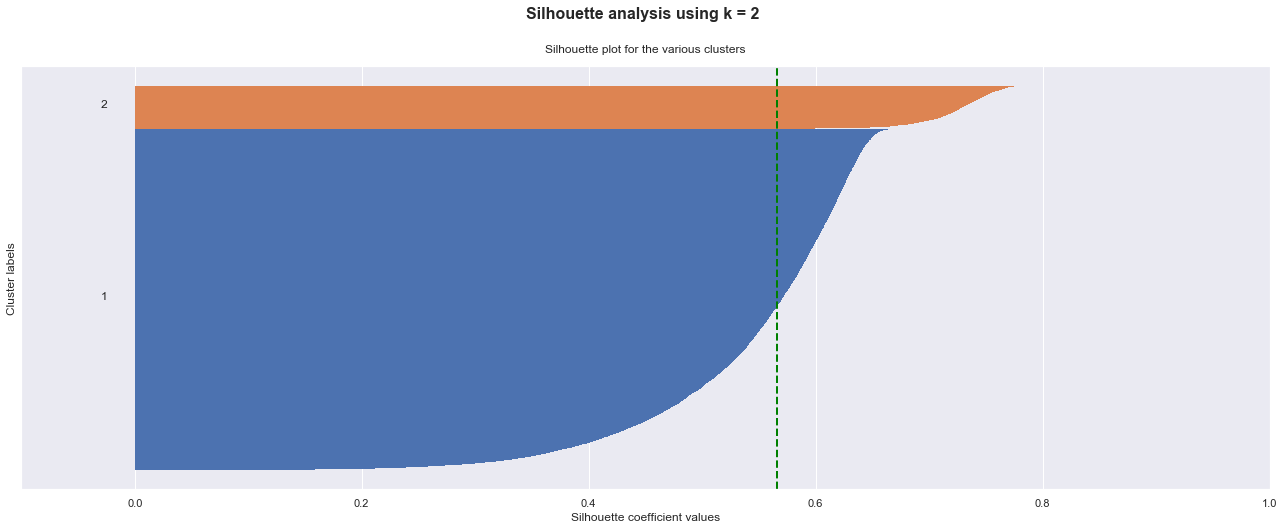

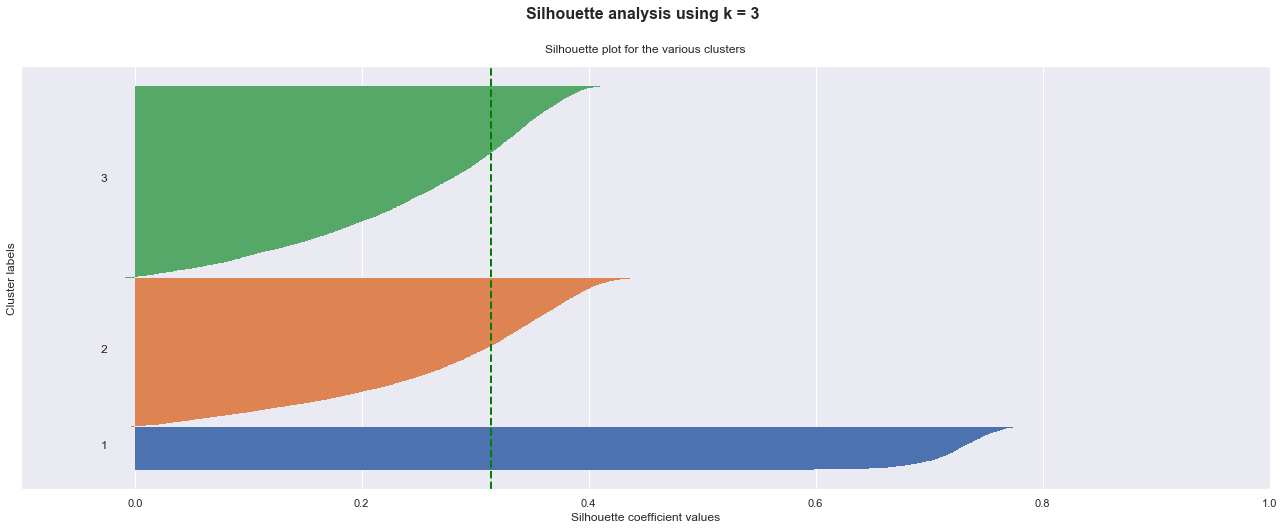

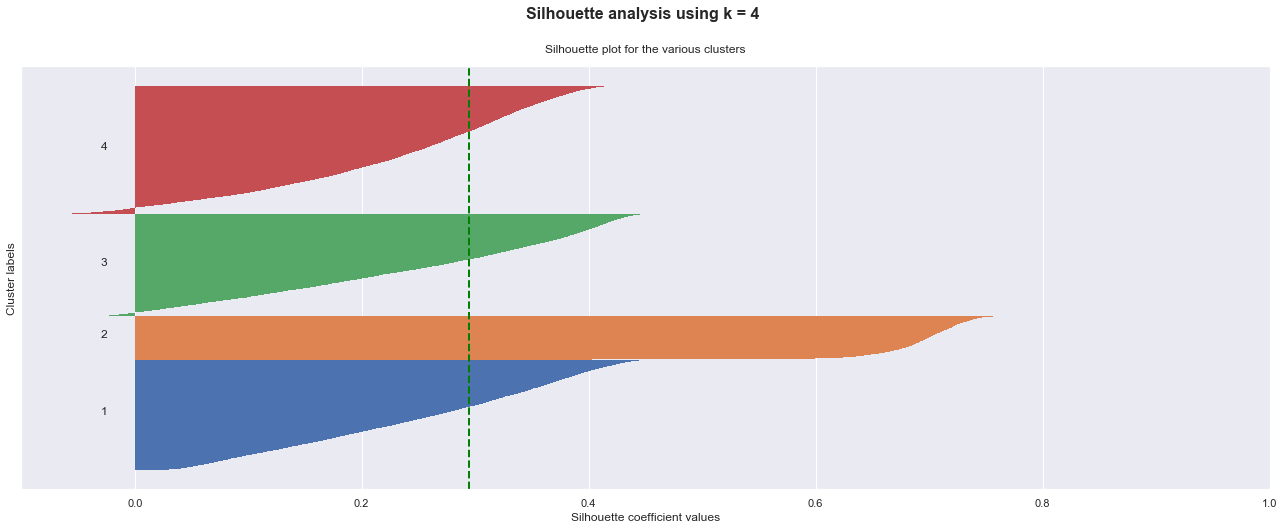

In [459]:
from sklearn.metrics import silhouette_samples

for i, k in enumerate([2, 3, 4]):
    fig, (ax1) = plt.subplots(1)
    fig.set_size_inches(18, 7)
    
    # Run the Kmeans algorithm
    km = KMeans(n_clusters=k)
    labels = km.fit_predict(data.drop(['ID'],1))
    centroids = km.cluster_centers_

    # Get silhouette samples
    silhouette_vals = silhouette_samples(data.drop(['ID'],1), labels)

    # Silhouette plot
    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score and plot it
    avg_score = np.mean(silhouette_vals)
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    ax1.set_xlabel('Silhouette coefficient values')
    ax1.set_ylabel('Cluster labels')
    ax1.set_title('Silhouette plot for the various clusters', y=1.02);
    
    # Scatter plot of data colored with labels

    plt.tight_layout()
    plt.suptitle(f'Silhouette analysis using k = {k}',
                 fontsize=16, fontweight='semibold', y=1.05);

In [457]:
data.columns

Index(['Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control',
       'Composure', 'Crossing', 'Curve', 'Dribbling', 'Finishing',
       'Free kick accuracy', 'GK diving', 'GK handling', 'GK kicking',
       'GK positioning', 'GK reflexes', 'Heading accuracy', 'ID',
       'Interceptions', 'Jumping', 'Long passing', 'Long shots', 'Marking',
       'Penalties', 'Positioning', 'Reactions', 'Short passing', 'Shot power',
       'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle',
       'Strength', 'Vision', 'Volleys'],
      dtype='object')

In [491]:
pca_data['pca1']=pca_data[1]

In [489]:
pca_data['pca0']=pca_data[0]

In [493]:
pca_data.dtypes

0          float64
1          float64
2          float64
3          float64
4          float64
cluster      int32
pca0       float64
pca1       float64
dtype: object

### LOF

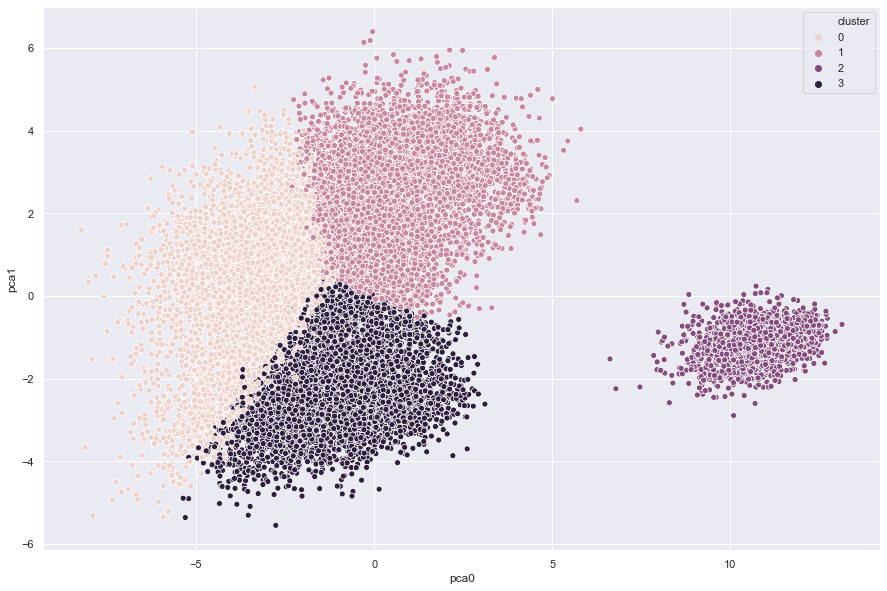

In [494]:
sns.scatterplot('pca0', 'pca1',data=pca_data, hue='cluster')

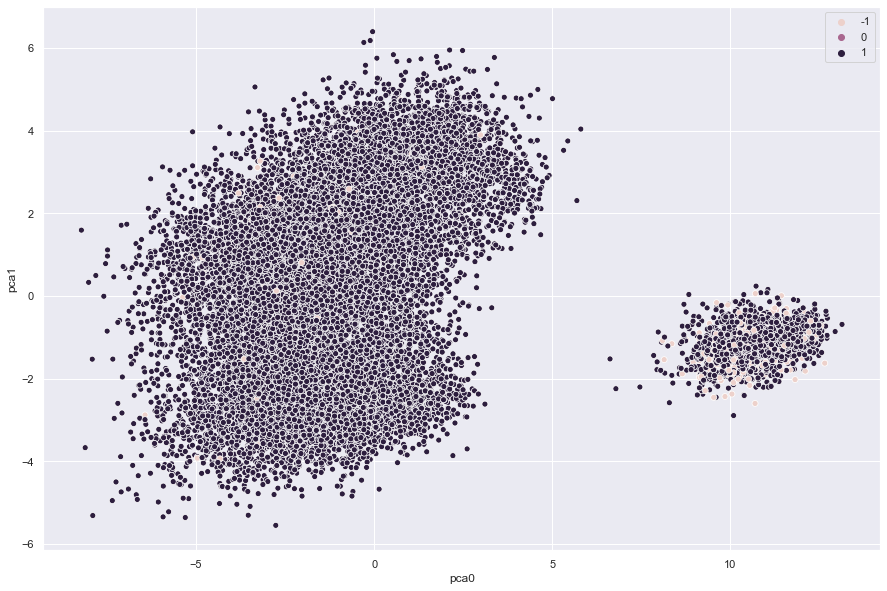

In [495]:
sns.scatterplot('pca0', 'pca1',data=pca_data, hue=outlier)

In [471]:
from sklearn.neighbors import LocalOutlierFactor
X = data
clf = LocalOutlierFactor(n_neighbors=20)
outlier=clf.fit_predict(X)
clf.negative_outlier_factor_

array([-0.98618982, -1.09640911, -1.08392545, ..., -1.1269303 ,
       -0.99072525, -1.10056121])

In [472]:
outlier[:20]

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1])

In [ ]:
from sklearn.ensemble import IsolationForest

In [499]:
# training the model

clf = IsolationForest(max_samples=100, random_state=1)
clf.fit(data)

# predictions
y_pred_if = clf.predict(data)



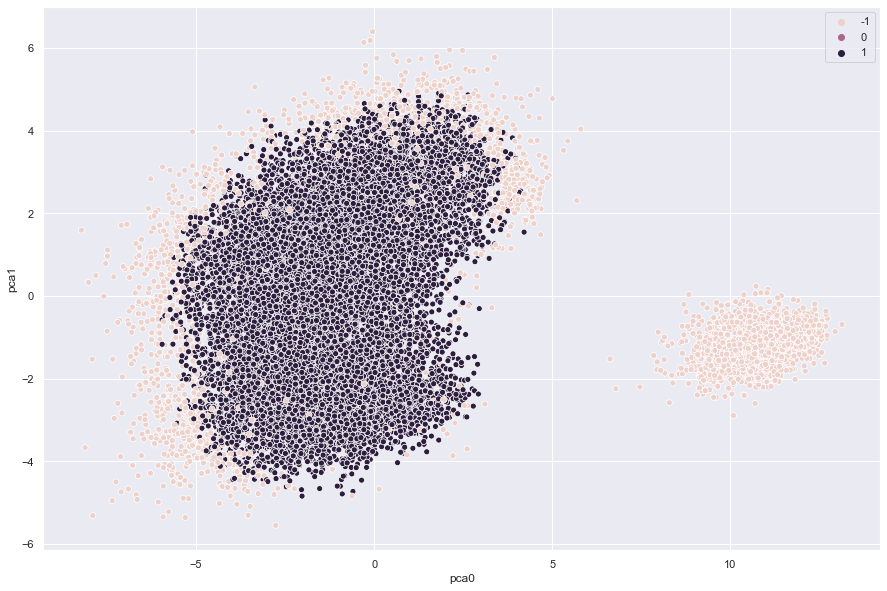

In [500]:
sns.scatterplot('pca0', 'pca1',data=pca_data, hue=y_pred_if)

In [502]:
pca_data

,0,1,2,3,4,cluster,pca0,pca1
0,-8.114011,-3.671575,4.329149,0.928299,-3.195484,0,-8.114011,-3.671575
1,-7.900760,-5.313969,3.336370,-0.910917,-0.620596,0,-7.900760,-5.313969
2,-7.103004,-4.742318,2.429208,-1.030647,-0.489087,0,-7.103004,-4.742318
3,-6.359463,-3.287122,5.459131,0.125880,-1.458565,0,-6.359463,-3.287122
4,8.578479,-1.739644,6.874676,-2.458817,-2.713461,2,8.578479,-1.739644
...,...,...,...,...,...,...,...,...
17924,11.771275,-1.026952,-1.427030,0.941242,2.610617,2,11.771275,-1.026952
17925,10.580225,-0.345354,-0.782149,0.823365,1.002458,2,10.580225,-0.345354
17926,3.112532,-2.617942,-2.795928,0.618990,-0.262034,3,3.112532,-2.617942
17927,2.325186,0.351658,-2.615703,-0.418490,1.340909,1,2.325186,0.351658


In [503]:
pca_data.stack().reset_index()

,level_0,level_1,0
0,0,0,-8.114011
1,0,1,-3.671575
2,0,2,4.329149
3,0,3,0.928299
4,0,4,-3.195484
...,...,...,...
143427,17928,3,1.662447
143428,17928,4,0.063525
143429,17928,cluster,1.000000
143430,17928,pca0,5.695173


### Hierarchical clustering

In [527]:
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

In [546]:
Z = hierarchy.linkage(data.drop(["ID"],1)[::5], 'ward')

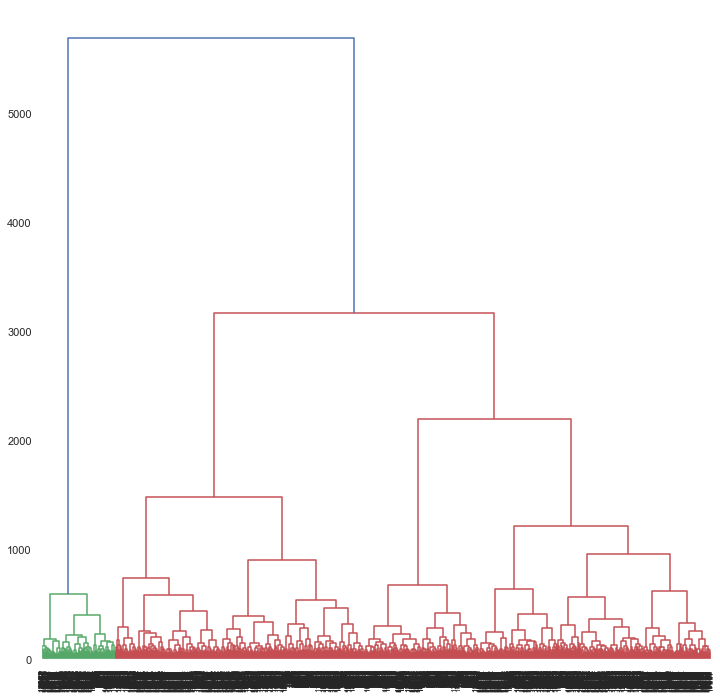

In [547]:
fig, ax = plt.subplots(figsize=(12,12))
hierarchy.dendrogram(Z, leaf_rotation=90, leaf_font_size=8, labels=data.drop(["ID"],1)[::5].index)
None

In [531]:
 agg = AgglomerativeClustering(5, linkage='ward')

In [532]:
 agg.fit(data)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=5)

In [533]:
 AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=5)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=5)

In [534]:
km3 = KMeans(3)

In [536]:
km3.fit(data)
km3_df = pd.DataFrame(km3.cluster_centers_, columns = data.columns)
data_km3 = data.assign(km_cluster = km3.labels_)
data_km3['ID'] = data['ID']

In [537]:
 data_cluster = data_km3.assign(agg_cluster = agg.labels_)

In [538]:
data2.columns

Index(['ID', 'Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club',
       'Value', 'Wage', 'Special'],
      dtype='object')

In [540]:
data2["ID"]=data2["ID"].astype(str)
data_cluster["ID"]=data_cluster["ID"].astype(str)


In [545]:
data2.Club = data2.Club.replace(np.nan, 'Unknown')
joint = data2.merge(data_cluster, on='ID')

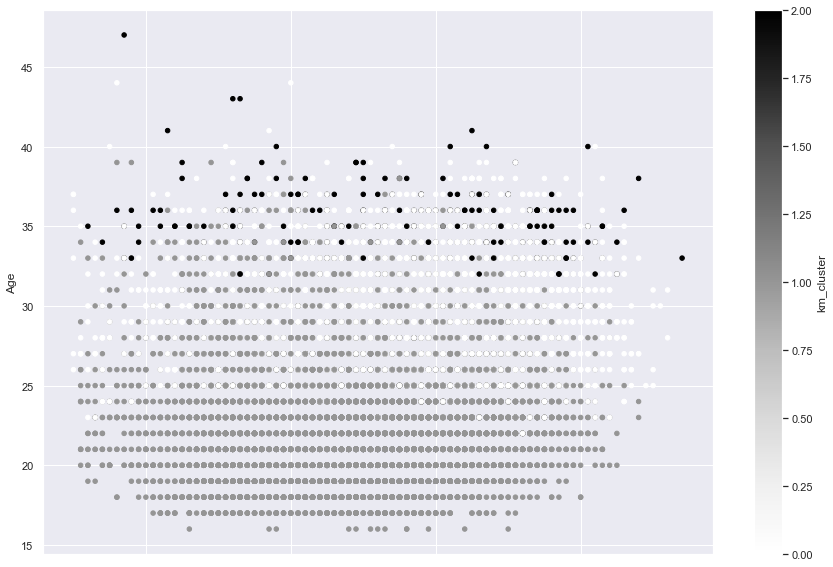

In [542]:
joint.plot.scatter('Vision', 'Age', c='km_cluster')

In [ ]:
 def plot_3D(data_3D, labels=None, **kwargs):
    fig_ = plt.figure(figsize=(10,8))
    ax = Axes3D(fig_)
    ax.scatter(data_3D.iloc[:, 0], data_3D.iloc[:, 1], data_3D.iloc[:, 2], c=labels, **kwargs) 
    return ax